# Lab 6: Root finding (2)

In this lab we will continue our study of root-finding methods, now considering the famous Newton-Raphson algorithm. This requires that we know the function's derivative; we can either specify this by hand or use the differentiation algorithms from Lab 5.

## The Newton-Raphson method: basics

Recall that the Newton-Raphson algorithm involves linearising the function at some guess $x_0$ – that is, we follow the *derivative* down to the $x$-axis rather than the function itself:

![newton.png](attachment:newton.png)

Mathematically, 
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

**Write a function `newton_step(f, fp, x0)` to calculate the next step** (*i.e.*, $x_1$) **from the Newton-Raphson algorithm**, given function `f` and its derivative `fp` (“f prime”) and starting value `x0`.

In [1]:
#def fp(f,x,1e-3):
#    return (4*CD(f,x,h/2)-CD(f,x,h))/3

def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    
    return x0 - f(x0)/fp(x0) # your code here

As a test, let's use this to calculate $\sqrt{2}$. **Define two (Python) functions** correponding to the mathematical functions $f(x) = x^2 - 2$ and $f'(x) = 2x$. Then **choose a suitable starting guess** and **write a loop to call your Newton-Raphson function until it has converged** – say, until $x_n$ and $x_{n+1}$ differ by less than $10^{-8}$. **Check your result** by squaring it and seeing whether you get 2. **How many iterations were necessary?**

In [2]:
def f(x):
    return x**2 - 2

def fp(x):
    return 2*x

n=1
x=1
#xn=newton_step(f,fp,1.3)
xn = 1.3
while abs(x-xn) > 1e-8:
    n += 1
    a=xn
    xn=newton_step(f,fp,x)
    x=a

In [3]:
x**2

2.0000000000786464

Let's investigate how convergence depends on the starting guess. What happens if you start with a guess that is further away? **Try some different starting guesses and come to a conclusion about how dependent the answer we get is on the starting point. Can you explain your results?** (Suggested guesses to try: $10^5$; $-1$; $0$.)

In [91]:
def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    
    return x0 - f(x0)/fp(x0) # your code here



def newton_iteration(f,guess, step, fp=None):
    n=1
    x=1
    if fp:
        xn=newton_step(f,fp,guess)
    else: 
        xn=newton_CD_step(f,guess)
    while abs(x-xn) > 1e-9:
        n +=1
        a=xn
        if fp:
            xn=newton_step(f,fp,xn)
        else:
            xn=newton_CD_step(f,xn)
        x=a
    return print(xn,n)

#newton_iteration(f,fp,10**5,newton_step) # takes greater number of step to converge to root
#newton_iteration(f,fp,-1, newton_step) #negative starting point gives negative root
#newton_iteration(f,fp,0) produces division by zero error

In [55]:
newton_iteration(f,1,newton_CD_step)


(1.4142135623730951, 5)

In [64]:
newton_iteration(f,10**5,newton_step,fp)

(1.4142135623730951, 21)

In [73]:
from numpy import sin, cos

def sincos(x):
    return sin(cos(x))-x
    
def sincosp(x):
    return -sin(x)*cos(cos(x))-1

A=newton_iteration(sincos,1,newton_step,sincosp)
A[0]

0.69481969073078753

In [72]:
newton_iteration(sincos,1,newton_CD_step,sincosp)

(0.69481969073078753, 5)

▶ **CHECKPOINT 1**

## A trickier example

Let's try a more interesting function. We saw in the very first lecture that, in quantum mechanics, the energies available to a particle trapped in a finite well are given by the solutions of equations similar to $\tan(x) = x$. **Use the Newton-Raphson method to find all solutions to this equation in the range $0 \leq x \leq 10$.** 

*Hint*: You will need to rearrange the equation into the form $g(x) = 0$ for some $g(x)$. You may find it helpful to plot this function first.

*Hint 2*: The derivative of $\tan(x)$ is $\sec^2(x)$. The `pylab` module does *not* contain a secant function, so you may want to define your own (recalling that $\sec(x) = 1/\cos(x)$).

<IPython.core.display.Javascript object>


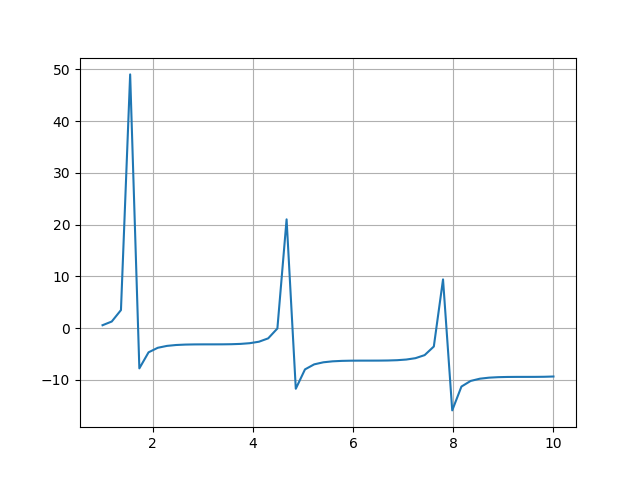

nan 549
4.49340945791 4
7.72525183694 13
nan 521


J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in tan
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in cos


In [93]:
from pylab import tan, cos, figure, plot,linspace, grid
%matplotlib notebook
def g(x):
    return tan(x)-x
def gp(x):
    return ((1/cos(x))**2) -1

figure()
grid()
x=linspace(1,10)
plot(x,g(x))
newton_iteration(g,4,newton_step,gp) # Great number of iterations when initial guess is ~.7 away from root, converging too slowly, no correct rou
newton_iteration(g,4.5,newton_step,gp) # 
newton_iteration(g,7.6,newton_step,gp)
newton_iteration(g,7,newton_step,gp)

**Explore carefully for which starting guesses the Newton-Raphson converges, to which solution, and in how many iterations. Can you explain your results?**

(Suggested guesses to try: 4, 4.5, 8)

▶ **CHECKPOINT 2**

## Using numerical derivatives

Of course, sometimes it is inconvenient to program in the derivative of the function we're exploring. Fortunately, last lab we have seen how to calculate the derivative numerically. I have copied below our central-difference function from that lab, setting the default value of the step size $h$ to $10^{-5}$.

In [17]:
def CD(f, x, h=1e-5):
    """Estimate the derivative f'(x) using the central difference algorithm with step size h."""
    return (f(x + h/2) - f(x - h/2))/h

In [22]:
def newton_CD_step(f,x0):
    return x0 - f(x0)/CD(f,x0)

In [83]:
newton_iteration(g,gp,4.5)

AttributeError: 'function' object has no attribute 'tan'

In [70]:
newton_iteration(f,10**5,newton_step,fp)

(1.4142135623730951, 21)

In [71]:
newton_iteration(f,10**5,newton_CD_step)

(1.4142135623730951, 21)

In [75]:
newton_iteration(sincos,0.1,newton_CD_step)

(0.69481969073078753, 5)

In [76]:
newton_iteration(sincos,1,newton_step,sincosp)

(0.69481969073078753, 5)

**Write a revised function `newton_CD_step(f, x0)` to perform one step of the Newton-Raphson algorithm, this time using the derivative from the `CD()` function.**

**Can you find the same roots using this method as you did using the exact derivative?**

▶ **CHECKPOINT 3**

In [86]:
newton_iteration(g,7.5,newton_step,gp)

J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in tan
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in cos


(nan, 462)

In [87]:
newton_iteration(g,7.5,newton_CD_step)

J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in tan


(nan, 21)

## Mini-report 1 (10 marks, due Friday 19 October at 1 pm)

For this report you don’t need to write an introduction, methods, conclusion, or references section; I simply want results and discussion.

Your task is to investigate the root-finding algorithms we’ve learnt: the bisection method, *regula falsi*, and now Newton’s method. An augmented list of our questions from lab 4:

- Which functions can these algorithms be applied to? 
- Can you predict how many iterations they will require? 
- Is it possible that they will not converge? 
- Is it possible that they will converge, but not to the nearest root?
- Is it possible that they will converge to a value that is not a root?
- Is it possible that there is a root within the initial range that they do not find?

You may experiment with any function you choose, including the functions from lab 4. For Newton’s method you might like to try $m(x) = \cos(x)$ (try starting with very small but nonzero numbers), $n(x) = x^3 - 2x + 2$ (try starting with 0, 1, 0.14, 0.141) and, if you are feeling particularly masochistic,
$$
p(x) = \begin{cases}\sqrt{x} & x \geq 0 \\
-\sqrt{-x} & x \leq 0\end{cases}.
$$

Try to come to some general conclusions about where each of these methods is most useful and how they might be sensibly combined.

[click here](## Using numerical derivatives) 

In [7]:
vectorize?

Object `vectorize` not found.
